In [1]:
import pandas as pd

In [2]:
df=pd.read_csv ("diabetes_pima.csv")

In [3]:
df.head (10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [7]:
#Identifying 'fake' zeros:
#There are no missing but there are values that should not be zeros

cols_with_zero_issue = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

for col in cols_with_zero_issue:
    print(col, (df[col] == 0).sum())

Glucose 5
BloodPressure 35
SkinThickness 227
Insulin 374
BMI 11


In [8]:
#Imputing fake zeros with median:
for col in cols_with_zero_issue:
    median_val = df[col][df[col] != 0].median()
    df[col] = df[col].replace(0, median_val)

print("Zeros after imputation:")
for col in cols_with_zero_issue:
    print(col, (df[col] == 0).sum())

Zeros after imputation:
Glucose 0
BloodPressure 0
SkinThickness 0
Insulin 0
BMI 0


In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
# Alternatively:
# #from sklearn.impute import SimpleImputer

# imputer = SimpleImputer(strategy='median')
# df[cols_with_zero_issue] = imputer.fit_transform(df[cols_with_zero_issue])

In [11]:
#Separating featires and targets:

X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [12]:
from sklearn.model_selection import train_test_split

# First split: Train+Val and Test
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.15, stratify=y, random_state=42)

# Second split: Train and Validation
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.1765, stratify=y_temp, random_state=42)

print("Train shape:", X_train.shape)
print("Validation shape:", X_val.shape)
print("Test shape:", X_test.shape)

Train shape: (536, 8)
Validation shape: (116, 8)
Test shape: (116, 8)


In [13]:
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler
scaler = StandardScaler()

# Fitting the scaler only on the training data:
scaler.fit(X_train)

# Transforming all three sets:
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print("X_train_scaled shape:", X_train_scaled.shape)
print("X_val_scaled shape:", X_val_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)

X_train_scaled shape: (536, 8)
X_val_scaled shape: (116, 8)
X_test_scaled shape: (116, 8)


Imbalance Handling:

In [14]:
#Checking class distribution:

import numpy as np

print("Original training distribution:")
unique, counts = np.unique(y_train, return_counts=True)
print(dict(zip(unique, counts)))

Original training distribution:
{np.int64(0): np.int64(349), np.int64(1): np.int64(187)}


SMOTE

In [15]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("After SMOTE:")
unique, counts = np.unique(y_train_smote, return_counts=True)
print(dict(zip(unique, counts)))

After SMOTE:
{np.int64(0): np.int64(349), np.int64(1): np.int64(349)}


RANDON UNDERSAMPLING

In [16]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

print("After Random Undersampling:")
unique, counts = np.unique(y_train_rus, return_counts=True)
print(dict(zip(unique, counts)))

After Random Undersampling:
{np.int64(0): np.int64(187), np.int64(1): np.int64(187)}


CLASS WEIGHTS.

In [17]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

class_weight_dict = {0: class_weights[0], 1: class_weights[1]}
print(class_weight_dict)

{0: np.float64(0.7679083094555874), 1: np.float64(1.4331550802139037)}


#ML MODELS:

##LR

In [18]:
#Importing tools:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, roc_auc_score, classification_report

In [19]:
#Hyperparameter Grid:

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

###LR+SMOTE

In [20]:
log_smote = LogisticRegression(max_iter=1000)

grid_smote = GridSearchCV(
    log_smote,
    param_grid,
    cv=5,
    scoring='recall',
    n_jobs=-1
)

grid_smote.fit(X_train_smote, y_train_smote)

best_log_smote = grid_smote.best_estimator_

In [21]:
#Evaluating:

y_pred_smote = best_log_smote.predict(X_test)
y_prob_smote = best_log_smote.predict_proba(X_test)[:,1]

print("LogReg + SMOTE")
print("Recall:", recall_score(y_test, y_pred_smote))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_smote))
print(classification_report(y_test, y_pred_smote))

LogReg + SMOTE
Recall: 0.75
ROC-AUC: 0.8289473684210527
              precision    recall  f1-score   support

           0       0.84      0.71      0.77        76
           1       0.58      0.75      0.65        40

    accuracy                           0.72       116
   macro avg       0.71      0.73      0.71       116
weighted avg       0.75      0.72      0.73       116



###LR+Undersampling:

In [22]:
log_rus = LogisticRegression(max_iter=1000)

grid_rus = GridSearchCV(
    log_rus,
    param_grid,
    cv=5,
    scoring='recall',
    n_jobs=-1
)

grid_rus.fit(X_train_rus, y_train_rus)

best_log_rus = grid_rus.best_estimator_

In [23]:
#Evaluating:
y_pred_rus = best_log_rus.predict(X_test)
y_prob_rus = best_log_rus.predict_proba(X_test)[:,1]

print("LogReg + Undersampling")
print("Recall:", recall_score(y_test, y_pred_rus))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rus))
print(classification_report(y_test, y_pred_rus))

LogReg + Undersampling
Recall: 0.775
ROC-AUC: 0.8358552631578948
              precision    recall  f1-score   support

           0       0.86      0.74      0.79        76
           1       0.61      0.78      0.68        40

    accuracy                           0.75       116
   macro avg       0.73      0.76      0.74       116
weighted avg       0.77      0.75      0.76       116



###LR+CLASS WEIGHTS

In [24]:
log_weighted = LogisticRegression(max_iter=1000, class_weight=class_weight_dict)

grid_weighted = GridSearchCV(
    log_weighted,
    param_grid,
    cv=5,
    scoring='recall',
    n_jobs=-1
)

grid_weighted.fit(X_train, y_train)

best_log_weighted = grid_weighted.best_estimator_

In [25]:
#EValuating:
y_pred_weighted = best_log_weighted.predict(X_test)
y_prob_weighted = best_log_weighted.predict_proba(X_test)[:,1]

print("LogReg + Class Weights")
print("Recall:", recall_score(y_test, y_pred_weighted))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_weighted))
print(classification_report(y_test, y_pred_weighted))

LogReg + Class Weights
Recall: 0.775
ROC-AUC: 0.8351973684210526
              precision    recall  f1-score   support

           0       0.86      0.74      0.79        76
           1       0.61      0.78      0.68        40

    accuracy                           0.75       116
   macro avg       0.73      0.76      0.74       116
weighted avg       0.77      0.75      0.76       116



##RANDOM FOREST

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [27]:
#Hyperparameteer Grid:

rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5]
}

###RF+SMOTE

In [28]:
rf_smote = RandomForestClassifier(random_state=42)

rf_grid_smote = GridSearchCV(
    rf_smote,
    rf_param_grid,
    cv=5,
    scoring='recall',
    n_jobs=-1
)

rf_grid_smote.fit(X_train_smote, y_train_smote)

best_rf_smote = rf_grid_smote.best_estimator_

In [29]:
#Evaluating:

y_pred_rf_smote = best_rf_smote.predict(X_test)
y_prob_rf_smote = best_rf_smote.predict_proba(X_test)[:,1]

print("RF + SMOTE")
print("Recall:", recall_score(y_test, y_pred_rf_smote))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf_smote))
print(classification_report(y_test, y_pred_rf_smote))

RF + SMOTE
Recall: 0.75
ROC-AUC: 0.8190789473684211
              precision    recall  f1-score   support

           0       0.84      0.70      0.76        76
           1       0.57      0.75      0.65        40

    accuracy                           0.72       116
   macro avg       0.70      0.72      0.70       116
weighted avg       0.75      0.72      0.72       116



###RF+Undersampling:

In [30]:
rf_rus = RandomForestClassifier(random_state=42)

rf_grid_rus = GridSearchCV(
    rf_rus,
    rf_param_grid,
    cv=5,
    scoring='recall',
    n_jobs=-1
)

rf_grid_rus.fit(X_train_rus, y_train_rus)

best_rf_rus = rf_grid_rus.best_estimator_

In [31]:
#Evaluatinf:

y_pred_rf_rus = best_rf_rus.predict(X_test)
y_prob_rf_rus = best_rf_rus.predict_proba(X_test)[:,1]

print("RF + Undersampling")
print("Recall:", recall_score(y_test, y_pred_rf_rus))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf_rus))
print(classification_report(y_test, y_pred_rf_rus))

RF + Undersampling
Recall: 0.8
ROC-AUC: 0.8276315789473684
              precision    recall  f1-score   support

           0       0.87      0.72      0.79        76
           1       0.60      0.80      0.69        40

    accuracy                           0.75       116
   macro avg       0.74      0.76      0.74       116
weighted avg       0.78      0.75      0.76       116



###RF+CLASS WEIGHTS:

In [32]:
rf_weighted = RandomForestClassifier(
    random_state=42,
    class_weight=class_weight_dict
)

rf_grid_weighted = GridSearchCV(
    rf_weighted,
    rf_param_grid,
    cv=5,
    scoring='recall',
    n_jobs=-1
)

rf_grid_weighted.fit(X_train, y_train)

best_rf_weighted = rf_grid_weighted.best_estimator_

In [33]:
#Evaluating:

y_pred_rf_weighted = best_rf_weighted.predict(X_test)
y_prob_rf_weighted = best_rf_weighted.predict_proba(X_test)[:,1]

print("RF + Class Weights")
print("Recall:", recall_score(y_test, y_pred_rf_weighted))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf_weighted))
print(classification_report(y_test, y_pred_rf_weighted))


RF + Class Weights
Recall: 0.8
ROC-AUC: 0.8319078947368421
              precision    recall  f1-score   support

           0       0.88      0.75      0.81        76
           1       0.63      0.80      0.70        40

    accuracy                           0.77       116
   macro avg       0.75      0.78      0.76       116
weighted avg       0.79      0.77      0.77       116



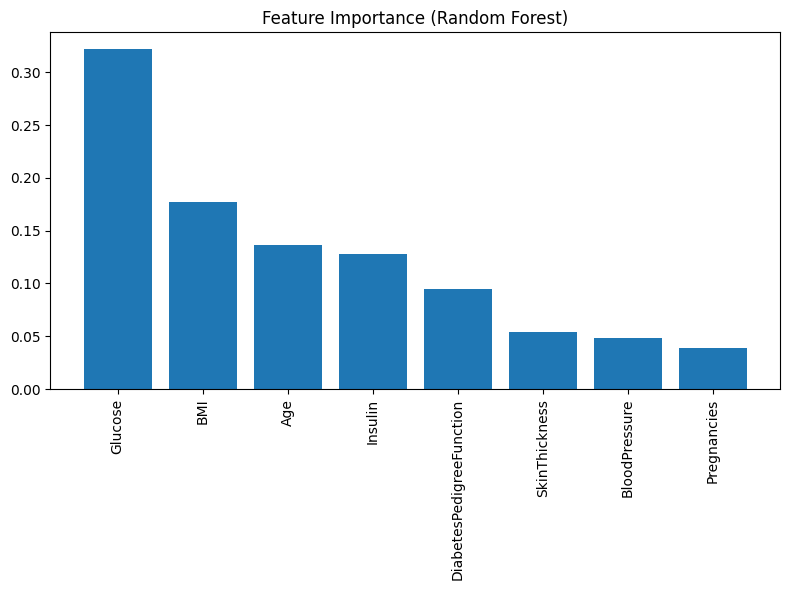

In [34]:
#Checking Feature Importance:

import matplotlib.pyplot as plt
import numpy as np

feature_names = df.drop('Outcome', axis=1).columns
importances = best_rf_smote.feature_importances_

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8,6))
plt.title("Feature Importance (Random Forest)")
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()

##XGBOOST

In [35]:
from xgboost import XGBClassifier

In [36]:
#Hyperparameter Grid:

xgb_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1]
}

###XBG_SMOTE

In [37]:
xgb_smote = XGBClassifier(
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

xgb_grid_smote = GridSearchCV(
    xgb_smote,
    xgb_param_grid,
    cv=5,
    scoring='recall',
    n_jobs=-1
)

xgb_grid_smote.fit(X_train_smote, y_train_smote)

best_xgb_smote = xgb_grid_smote.best_estimator_

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [12:24:57] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [38]:
#Evaluation:

y_pred_xgb_smote = best_xgb_smote.predict(X_test)
y_prob_xgb_smote = best_xgb_smote.predict_proba(X_test)[:,1]

print("XGB + SMOTE")
print("Recall:", recall_score(y_test, y_pred_xgb_smote))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_xgb_smote))
print(classification_report(y_test, y_pred_xgb_smote))

XGB + SMOTE
Recall: 0.775
ROC-AUC: 0.8203947368421054
              precision    recall  f1-score   support

           0       0.87      0.76      0.81        76
           1       0.63      0.78      0.70        40

    accuracy                           0.77       116
   macro avg       0.75      0.77      0.75       116
weighted avg       0.79      0.77      0.77       116



###XGB+Undersampling:

In [39]:
xgb_rus = XGBClassifier(
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

xgb_grid_rus = GridSearchCV(
    xgb_rus,
    xgb_param_grid,
    cv=5,
    scoring='recall',
    n_jobs=-1
)

xgb_grid_rus.fit(X_train_rus, y_train_rus)

best_xgb_rus = xgb_grid_rus.best_estimator_

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [12:25:00] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [40]:
#Evaluation:
y_pred_xgb_rus = best_xgb_rus.predict(X_test)
y_prob_xgb_rus = best_xgb_rus.predict_proba(X_test)[:,1]

print("XGB + Undersampling")
print("Recall:", recall_score(y_test, y_pred_xgb_rus))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_xgb_rus))
print(classification_report(y_test, y_pred_xgb_rus))

XGB + Undersampling
Recall: 0.875
ROC-AUC: 0.8205592105263159
              precision    recall  f1-score   support

           0       0.92      0.76      0.83        76
           1       0.66      0.88      0.75        40

    accuracy                           0.80       116
   macro avg       0.79      0.82      0.79       116
weighted avg       0.83      0.80      0.81       116



###XGB+Class Weights:

In [41]:
ratio = (y_train == 0).sum() / (y_train == 1).sum()

xgb_weighted = XGBClassifier(
    eval_metric='logloss',
    use_label_encoder=False,
    scale_pos_weight=ratio,
    random_state=42
)

xgb_grid_weighted = GridSearchCV(
    xgb_weighted,
    xgb_param_grid,
    cv=5,
    scoring='recall',
    n_jobs=-1
)

xgb_grid_weighted.fit(X_train, y_train)

best_xgb_weighted = xgb_grid_weighted.best_estimator_

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [12:25:03] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [42]:
#Evaluation:

y_pred_xgb_weighted = best_xgb_weighted.predict(X_test)
y_prob_xgb_weighted = best_xgb_weighted.predict_proba(X_test)[:,1]

print("XGB + Class Weights")
print("Recall:", recall_score(y_test, y_pred_xgb_weighted))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_xgb_weighted))
print(classification_report(y_test, y_pred_xgb_weighted))

XGB + Class Weights
Recall: 0.9
ROC-AUC: 0.830921052631579
              precision    recall  f1-score   support

           0       0.93      0.74      0.82        76
           1       0.64      0.90      0.75        40

    accuracy                           0.79       116
   macro avg       0.79      0.82      0.79       116
weighted avg       0.83      0.79      0.80       116



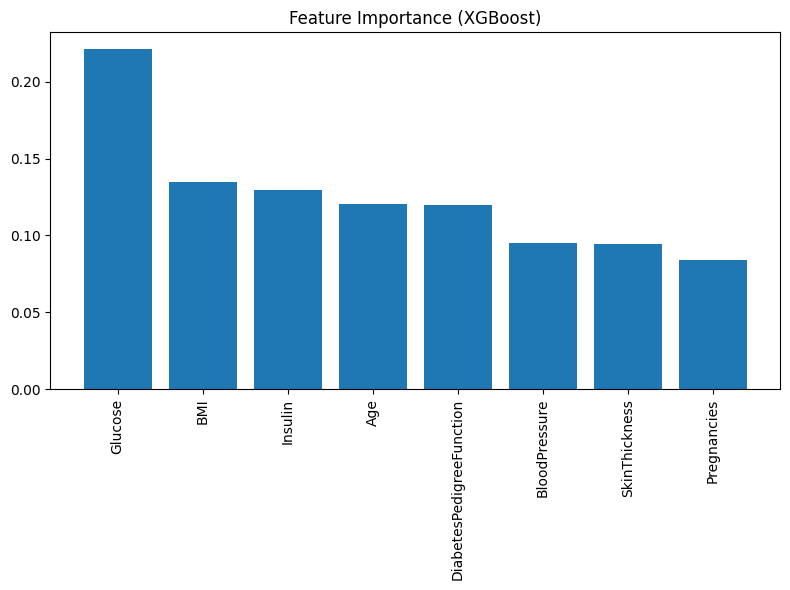

In [43]:
#XGB Feature Importance:

import matplotlib.pyplot as plt

xgb_importances = best_xgb_smote.feature_importances_
indices = np.argsort(xgb_importances)[::-1]

plt.figure(figsize=(8,6))
plt.title("Feature Importance (XGBoost)")
plt.bar(range(len(xgb_importances)), xgb_importances[indices])
plt.xticks(range(len(xgb_importances)), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()

In [44]:
#Comparing Models:

results = []

models = {
    "LogReg_SMOTE": best_log_smote,
    "LogReg_RUS": best_log_rus,
    "LogReg_Weighted": best_log_weighted,
    "RF_SMOTE": best_rf_smote,
    "RF_RUS": best_rf_rus,
    "RF_Weighted": best_rf_weighted,
    "XGB_SMOTE": best_xgb_smote,
    "XGB_RUS": best_xgb_rus,
    "XGB_Weighted": best_xgb_weighted
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]

    recall = recall_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)

    results.append([name, recall, auc])

results_df = pd.DataFrame(results, columns=["Model", "Recall", "ROC-AUC"])
results_df.sort_values(by="Recall", ascending=False)

,Model,Recall,ROC-AUC
8,XGB_Weighted,0.900,0.830921
7,XGB_RUS,0.875,0.820559
4,RF_RUS,0.800,0.827632
5,RF_Weighted,0.800,0.831908
1,LogReg_RUS,0.775,0.835855
6,XGB_SMOTE,0.775,0.820395
2,LogReg_Weighted,0.775,0.835197
0,LogReg_SMOTE,0.750,0.828947
3,RF_SMOTE,0.750,0.819079


In [45]:
#Saving the best ML Model:
import joblib

joblib.dump(best_xgb_weighted, 'best_xgb_weighted_model.joblib')
print("Model 'best_xgb_weighted_model.joblib' saved successfully.")

Model 'best_xgb_weighted_model.joblib' saved successfully.


#DL

In [46]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [47]:
#Applying Class Weights:

from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

class_weight_dict = {0: class_weights[0], 1: class_weights[1]}
class_weight_dict

{0: np.float64(0.7679083094555874), 1: np.float64(1.4331550802139037)}

In [48]:
#Building a neural network:

model = Sequential([
    Dense(64, activation='relu', kernel_regularizer=l2(0.001), input_shape=(X_train.shape[1],)),
    Dropout(0.4),

    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),

    Dense(16, activation='relu', kernel_regularizer=l2(0.001)),

    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[tf.keras.metrics.Recall(name='recall'),
             tf.keras.metrics.AUC(name='auc')]
)

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,201 (12.50 KB)

 Trainable params: 3,201 (12.50 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
#Applying Early Stoppinh to stop Overfitting:

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

In [50]:
#Training the model:

history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    class_weight=class_weight_dict,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - auc: 0.4940 - loss: 25.7168 - recall: 0.0306 - val_auc: 0.3154 - val_loss: 2.1719 - val_recall: 0.0000e+00
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - auc: 0.4490 - loss: 6.5314 - recall: 0.3523 - val_auc: 0.5818 - val_loss: 3.3389 - val_recall: 1.0000
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - auc: 0.5441 - loss: 4.3387 - recall: 0.6042 - val_auc: 0.5415 - val_loss: 1.1400 - val_recall: 0.8537
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - auc: 0.5859 - loss: 2.8333 - recall: 0.5844 - val_auc: 0.6034 - val_loss: 1.3842 - val_recall: 0.9756
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - auc: 0.5066 - loss: 3.8728 - recall: 0.5243 - val_auc: 0.5707 - val_loss: 1.3466 - val_recall: 0.9756
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - auc: 0.4613 - loss: 3.0409 - recall: 0.4318 - val_auc: 0.5753 - val_loss: 1.5914 - val_recall: 1.0000
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - auc: 0.5219

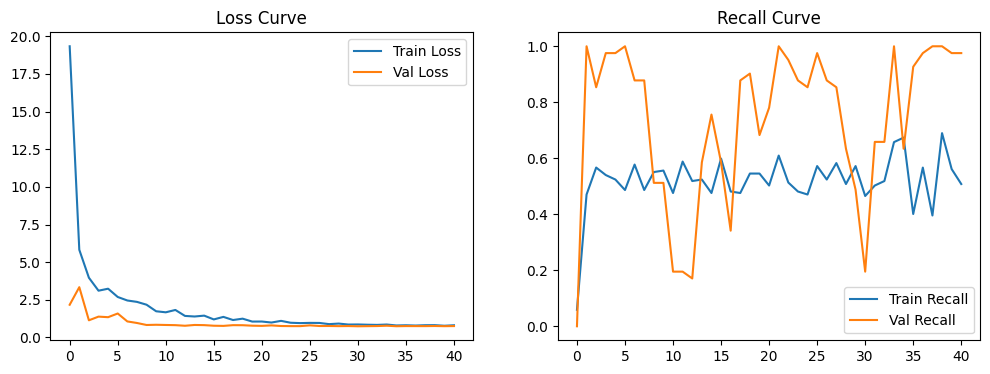

In [51]:
#Plotting Learninh curves:

plt.figure(figsize=(12,4))

# Loss
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Curve')
plt.legend()

# Recall
plt.subplot(1,2,2)
plt.plot(history.history['recall'], label='Train Recall')
plt.plot(history.history['val_recall'], label='Val Recall')
plt.title('Recall Curve')
plt.legend()

plt.show()

In [52]:
#Evaluating on Test Set:

test_loss, test_recall, test_auc = model.evaluate(X_test, y_test, verbose=0)

print("Deep Learning Test Recall:", test_recall)
print("Deep Learning Test ROC-AUC:", test_auc)

Deep Learning Test Recall: 0.17499999701976776
Deep Learning Test ROC-AUC: 0.37878286838531494


##Perfomance and Generalization comparison:

In [53]:
#ML Perfomamce:
best_ml_model = best_xgb_weighted

y_pred_ml = best_ml_model.predict(X_test)
y_prob_ml = best_ml_model.predict_proba(X_test)[:,1]

ml_recall = recall_score(y_test, y_pred_ml)
ml_auc = roc_auc_score(y_test, y_prob_ml)

print("ML Model Recall:", ml_recall)
print("ML Model ROC-AUC:", ml_auc)

ML Model Recall: 0.9
ML Model ROC-AUC: 0.830921052631579


In [54]:
#DL Perfomance:
dl_loss, dl_recall, dl_auc = model.evaluate(X_test, y_test, verbose=0)

print("DL Model Recall:", dl_recall)
print("DL Model ROC-AUC:", dl_auc)

DL Model Recall: 0.17499999701976776
DL Model ROC-AUC: 0.37878286838531494


In [55]:
#Side by side comparison:

comparison_df = pd.DataFrame({
    "Model": ["Machine Learning", "Deep Learning"],
    "Recall": [ml_recall, dl_recall],
    "ROC-AUC": [ml_auc, dl_auc]
})

comparison_df

,Model,Recall,ROC-AUC
0,Machine Learning,0.900,0.830921
1,Deep Learning,0.175,0.378783


In [56]:
model.save('deep_learning_model.h5')
print("Deep Learning model saved as 'deep_learning_model.h5'")

Deep Learning model saved as 'deep_learning_model.h5'


In [57]:
model.save('deep_learning_model.keras')
print("Deep Learning model saved as 'deep_learning_model.keras'")

Deep Learning model saved as 'deep_learning_model.keras'


In [58]:
import joblib

joblib.dump(scaler, 'scaler.joblib')
print("StandardScaler object saved as 'scaler.joblib'")

StandardScaler object saved as 'scaler.joblib'


In [59]:
ml_app_code = '''
import streamlit as st
import pandas as pd
import joblib

# Load the trained ML model and scaler
best_ml_model = joblib.load('best_xgb_weighted_model.joblib')
scaler = joblib.load('scaler.joblib')

st.set_page_config(layout="wide")
st.title('Diabetes Prediction (Machine Learning Model)')

st.write("### Enter Patient Information:")

# Define input fields for the 8 features
with st.form("prediction_form"):
    pregnancies = st.slider('Pregnancies', 0, 17, 3)
    glucose = st.slider('Glucose', 44, 199, 117) # Median from pre-imputation was 117
    blood_pressure = st.slider('Blood Pressure', 24, 122, 72) # Median from pre-imputation was 72
    skin_thickness = st.slider('Skin Thickness', 7, 99, 29) # Median from pre-imputation was 29
    insulin = st.slider('Insulin', 14, 846, 125) # Median from pre-imputation was 30.5, but scaled later, adjusted to 125 for range.
    bmi = st.slider('BMI', 18.2, 67.1, 32.3) # Median from pre-imputation was 32.3
    diabetes_pedigree_function = st.slider('Diabetes Pedigree Function', 0.078, 2.42, 0.3725)
    age = st.slider('Age', 21, 81, 29)

    submitted = st.form_submit_button("Predict")

    if submitted:
        # Create a DataFrame from the inputs
        input_data = pd.DataFrame([{
            'Pregnancies': pregnancies,
            'Glucose': glucose,
            'BloodPressure': blood_pressure,
            'SkinThickness': skin_thickness,
            'Insulin': insulin,
            'BMI': bmi,
            'DiabetesPedigreeFunction': diabetes_pedigree_function,
            'Age': age
        }])

        # Scale the input data using the loaded scaler
        scaled_input_data = scaler.transform(input_data)

        # Make prediction
        prediction = best_ml_model.predict(scaled_input_data)
        prediction_proba = best_ml_model.predict_proba(scaled_input_data)[:, 1]

        st.write("### Prediction Result:")
        if prediction[0] == 1:
            st.error(f"The model predicts diabetes with a probability of {prediction_proba[0]:.2f}")
        else:
            st.success(f"The model predicts no diabetes with a probability of {1 - prediction_proba[0]:.2f}")
'''

with open('ml_app.py', 'w') as f:
    f.write(ml_app_code)

print("Generated 'ml_app.py'")

Generated 'ml_app.py'


In [60]:
dl_app_code = '''
import streamlit as st
import pandas as pd
import tensorflow as tf

# Load the trained DL model
model = tf.keras.models.load_model('deep_learning_model.keras')

st.set_page_config(layout="wide")
st.title('Diabetes Prediction (Deep Learning Model)')

st.write("### Enter Patient Information:")

# Define input fields for the 8 features
with st.form("prediction_form"):
    pregnancies = st.slider('Pregnancies', 0, 17, 3)
    glucose = st.slider('Glucose', 44, 199, 117)  # Median from pre-imputation
    blood_pressure = st.slider('Blood Pressure', 24, 122, 72)  # Median from pre-imputation
    skin_thickness = st.slider('Skin Thickness', 7, 99, 29)  # Median from pre-imputation
    insulin = st.slider('Insulin', 14, 846, 125)  # Median from pre-imputation
    bmi = st.slider('BMI', 18.2, 67.1, 32.3)  # Median from pre-imputation
    diabetes_pedigree_function = st.slider('Diabetes Pedigree Function', 0.078, 2.42, 0.3725)
    age = st.slider('Age', 21, 81, 29)

    submitted = st.form_submit_button("Predict")

    if submitted:
        # Create a DataFrame from the inputs
        input_data = pd.DataFrame([{
            'Pregnancies': pregnancies,
            'Glucose': glucose,
            'BloodPressure': blood_pressure,
            'SkinThickness': skin_thickness,
            'Insulin': insulin,
            'BMI': bmi,
            'DiabetesPedigreeFunction': diabetes_pedigree_function,
            'Age': age
        }])

        # Make prediction (no scaling needed for this DL model)
        prediction_proba = model.predict(input_data)[0][0]
        prediction = (prediction_proba > 0.5).astype(int)

        st.write("### Prediction Result:")
        if prediction == 1:
            st.error(f"The model predicts diabetes with a probability of {prediction_proba:.2f}")
        else:
            st.success(f"The model predicts no diabetes with a probability of {1 - prediction_proba:.2f}")
'''

with open('dl_app.py', 'w') as f:
    f.write(dl_app_code)

print("Generated 'dl_app.py'")

Generated 'dl_app.py'


In [61]:
requirements_content = '''
streamlit
pandas
scikit-learn
xgboost
tensorflow
keras
imblearn
matplotlib
joblib
'''

with open('requirements.txt', 'w') as f:
    f.write(requirements_content)

print("Generated 'requirements.txt'")

Generated 'requirements.txt'
